# Table of Contents
* [0. Set-up](#Set-up)

* [1. Loading & preprocessing data](#1.Loading & preprocessing data)

* [2. Clustering](#2.-Clustering)
    * [2.1. K-means](#2.1 K-means)
    * [2.2. Gaussian Mixture](#2.2. Gaussian Mixture)

* [3. PCA](#3. PCA)

# 0. Set-up

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [66]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline
import sys, re, csv
from sklearn.cluster import KMeans


# 1. Loading & preprocessing Data

In [127]:
def clean_dir(ls):
    if '.DS_Store' in ls:
        ls.remove('.DS_Store')
        return ls
    else:
        return ls

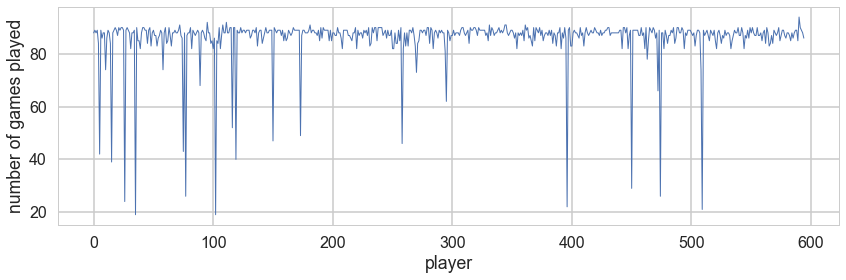

In [128]:
# Get the initial feature array
X_raw = []
X_raw2 = []
for f in file_ls:
    df = pd.read_csv('data/%s' % f)
    df['NAME'] = f.split('_')[1] + ' ' + f.split('_')[2]
    xx = df[['ID','FGP','3PP','FTP','PTS','REB','AST','BLK','STL','PF','TO','MIN']].values
    xx2 = df[['NAME','FGP','3PP','FTP','PTS','REB','AST','BLK','STL','PF','TO','MIN']].values
    if xx.shape[0] > 10:
        X_raw.append(xx)
        X_raw2.append(xx2)
        
num_games = [xx.shape[0] for xx in X_raw]

# For each player, take a look at how many games do we have data for
plt.figure(figsize = [14,4])
plt.plot(num_games, lw = 1)
plt.xlabel('player')
plt.ylabel('number of games played')
plt.show()

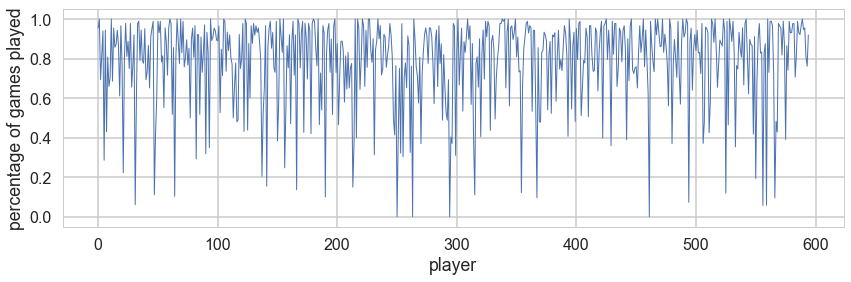

In [130]:
# We are only keeping data for players that have played more than 10% of the total number of games in a season
games_played = []
for xx in X_raw:
    games_played.append(np.sum(xx[:,-1] != 0)*1./xx.shape[0])
    
plt.figure(figsize = [14,4])
plt.plot(games_played, lw = 1)
plt.xlabel('player')
plt.ylabel('percentage of games played')
plt.show()

In [131]:
# We are only keeping data for players that have played more than 10% of the total number of games in a season
idx_ls = np.where(np.array(games_played) < 0.1)[0]
for i in reversed(idx_ls):
    X_raw.pop(i)
    X_raw2.pop(i)

In [17]:
features = ['ID','NUM_GM','FGP','3PP','FTP','PTS','REB','AST','BLK','STL','PF','TO','MIN']
X = np.empty([len(X_raw), len(features)])
for idx, xx in enumerate(X_raw):
    X[idx,0] = xx[0,0]
    X[idx,1] = xx.shape[0]
    X[idx,2:] = np.average(xx[:,1:], axis = 0)

In [18]:
# create a few dictionaries to convert between the name of the statistics to idx in feature array
feature_to_idx = {}
idx_to_feature = {}
for idx, feature in enumerate(features[1:]):
    feature_to_idx[feature] = idx
    idx_to_feature[idx] = feature

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(np.array(X[:,1:]))
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

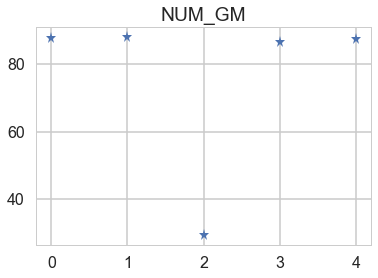

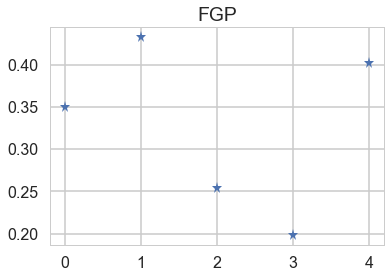

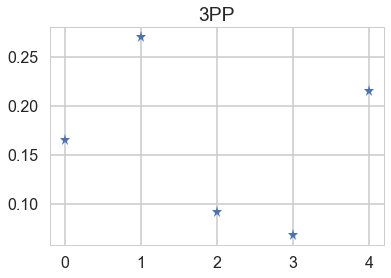

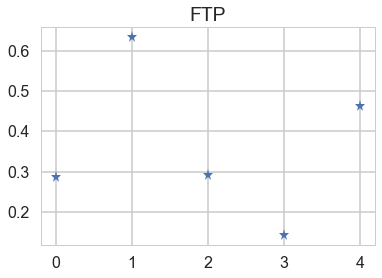

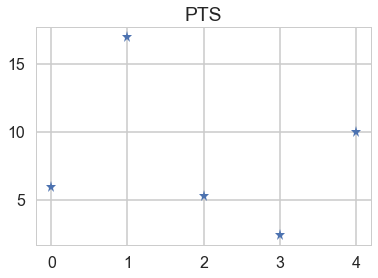

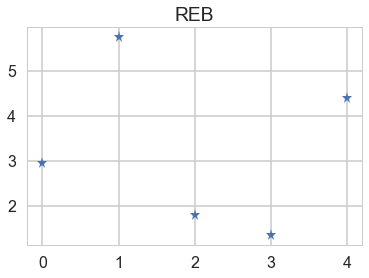

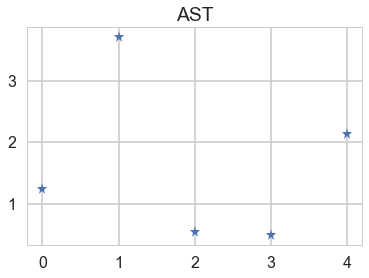

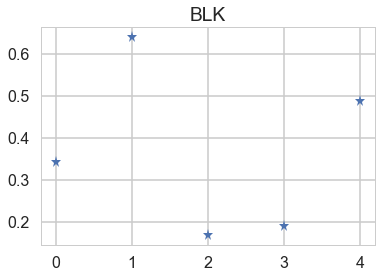

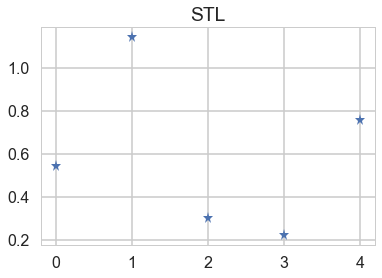

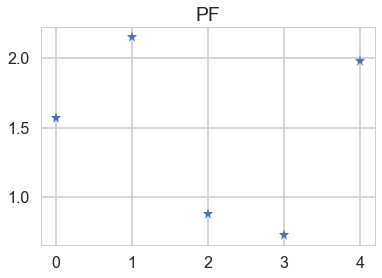

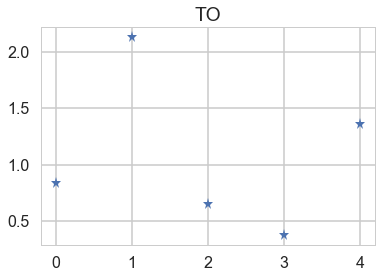

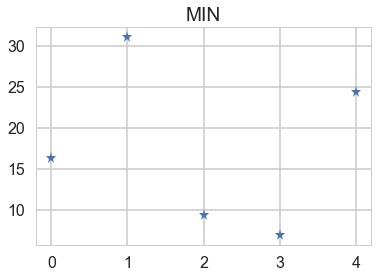

In [21]:
for i in range(cluster_centers.shape[1]):
    plt.plot(cluster_centers[:,i], '*')
    plt.title(features[i+1])
    plt.show()

In [65]:
df_stats = pd.DataFrame(data = X[:,1:], columns = features[1:])
df_stats.head()

,NUM_GM,FGP,3PP,FTP,PTS,REB,AST,BLK,STL,PF,TO,MIN
0,90.0,0.318578,0.257644,0.253344,6.366667,1.322222,2.233333,0.122222,0.411111,1.666667,1.077778,14.066667
1,84.0,0.422512,0.222190,0.415750,8.702381,6.130952,1.535714,0.666667,0.738095,1.880952,0.821429,22.523810
2,88.0,0.199875,0.053034,0.088068,1.704545,1.420455,0.340909,0.147727,0.193182,1.068182,0.465909,6.352273
3,86.0,0.409733,0.334337,0.482116,10.197674,6.011628,1.662791,0.662791,0.860465,2.093023,1.511628,28.302326
4,89.0,0.510652,0.327449,0.452438,14.887640,7.191011,3.134831,1.438202,0.820225,1.943820,1.314607,31.292135


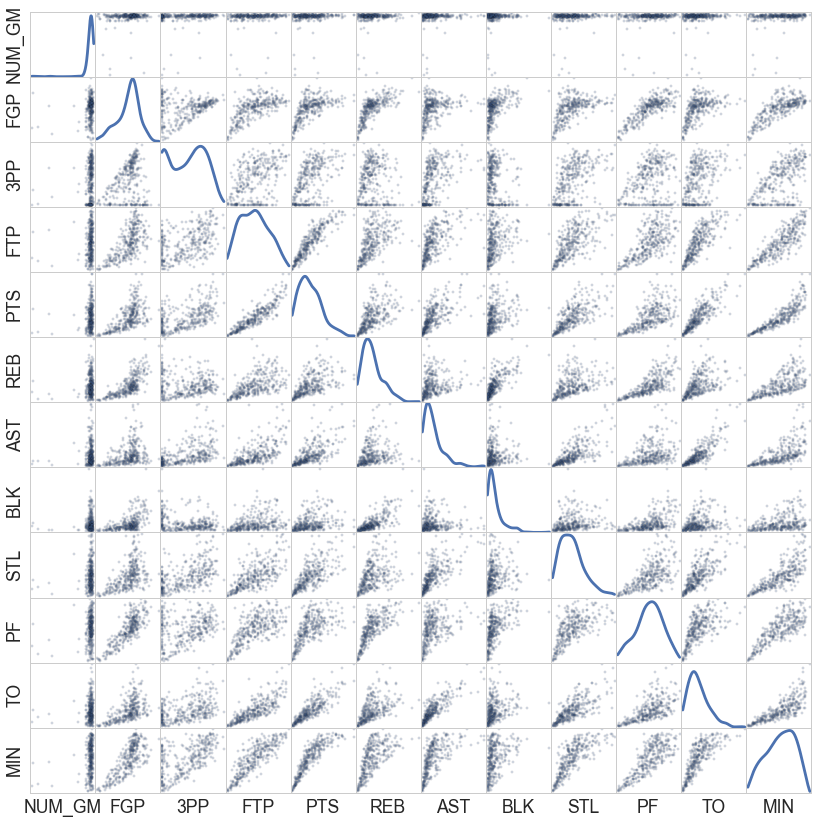

In [66]:
axs = pd.tools.plotting.scatter_matrix(df_stats, alpha=0.2, figsize=(14, 14), diagonal='kde'); #the diagonal will show kernel density
[ax.set_yticks([]) for ax in axs[:,0]] #turn off the ticks that take up way too much space in such a crammed figure
[ax.set_xticks([]) for ax in axs[-1,:]];

In [135]:
features = ['NAME','NUM_GM','FGP','3PP','FTP','PTS','REB','AST','BLK','STL','PF','TO','MIN']
X = np.empty([len(X_raw2), len(features)-1])
name = []
for idx, xx in enumerate(X_raw2):
    #X[idx,0] = xx[0, 0]
    name.append(xx[0, 0])
    X[idx,0] = xx.shape[0]
    X[idx,1:] = np.average(xx[:,1:], axis = 0)

In [136]:
df_stats2 = pd.DataFrame(data = X, columns = features[1:])
df_stats2.head()

,NUM_GM,FGP,3PP,FTP,PTS,REB,AST,BLK,STL,PF,TO,MIN
0,88.0,0.411818,0.152455,0.459977,6.647727,2.363636,2.306818,0.193182,0.590909,1.340909,0.875000,17.795455
1,89.0,0.541124,0.202056,0.683854,17.808989,10.213483,1.865169,1.629213,0.719101,2.966292,2.179775,31.258427
2,88.0,0.220364,0.186625,0.175932,3.056818,0.784091,1.318182,0.011364,0.352273,0.556818,0.613636,8.068182
3,89.0,0.326461,0.280326,0.618000,13.595506,4.988764,0.853933,0.303371,0.494382,1.393258,1.134831,24.494382
4,84.0,0.383274,0.303905,0.653643,14.880952,9.166667,2.238095,0.500000,0.726190,1.928571,1.714286,29.273810


In [137]:
df_stats2['NAME'] = name

In [138]:
df_stats2.head()

,NUM_GM,FGP,3PP,FTP,PTS,REB,AST,BLK,STL,PF,TO,MIN,NAME
0,88.0,0.411818,0.152455,0.459977,6.647727,2.363636,2.306818,0.193182,0.590909,1.340909,0.875000,17.795455,Cory Joseph
1,89.0,0.541124,0.202056,0.683854,17.808989,10.213483,1.865169,1.629213,0.719101,2.966292,2.179775,31.258427,Karl-Anthony Towns
2,88.0,0.220364,0.186625,0.175932,3.056818,0.784091,1.318182,0.011364,0.352273,0.556818,0.613636,8.068182,Shabazz Napier
3,89.0,0.326461,0.280326,0.618000,13.595506,4.988764,0.853933,0.303371,0.494382,1.393258,1.134831,24.494382,Ryan Anderson
4,84.0,0.383274,0.303905,0.653643,14.880952,9.166667,2.238095,0.500000,0.726190,1.928571,1.714286,29.273810,Kevin Love


In [139]:
df_stats2.shape

(585, 13)

In [141]:
intersted_col = ['FGP','3PP','FTP','PTS','REB','AST','BLK','STL','PF','TO']

In [142]:
#we use the data of 36 minutes to eastimate each palyer
def transfor_data_into_36min(ele, mins):
    r = ele/mins* 36
    return r
df_stats2['FGP'] = transfor_data_into_36min(df_stats2['FGP'], df_stats2['MIN'])

In [143]:
df_stats2['3PP'] = transfor_data_into_36min(df_stats2['3PP'], df_stats2['MIN'])
df_stats2['FTP'] = transfor_data_into_36min(df_stats2['FTP'], df_stats2['MIN'])
df_stats2['PTS'] = transfor_data_into_36min(df_stats2['PTS'], df_stats2['MIN'])
df_stats2['REB'] = transfor_data_into_36min(df_stats2['REB'], df_stats2['MIN'])
df_stats2['AST'] = transfor_data_into_36min(df_stats2['AST'], df_stats2['MIN'])
df_stats2['BLK'] = transfor_data_into_36min(df_stats2['BLK'], df_stats2['MIN'])
df_stats2['STL'] = transfor_data_into_36min(df_stats2['STL'], df_stats2['MIN'])
df_stats2['PF'] = transfor_data_into_36min(df_stats2['PF'], df_stats2['MIN'])
df_stats2['TO'] = transfor_data_into_36min(df_stats2['TO'], df_stats2['MIN'])
df_stats2['MIN'] = transfor_data_into_36min(df_stats2['MIN'], df_stats2['MIN'])

In [144]:
df_stats2.head()

,NUM_GM,FGP,3PP,FTP,PTS,REB,AST,BLK,STL,PF,TO,MIN,NAME
0,88.0,0.833103,0.308414,0.930529,13.448276,4.781609,4.666667,0.390805,1.195402,2.712644,1.770115,36.0,Cory Joseph
1,89.0,0.623206,0.232706,0.787587,20.510424,11.762761,2.148095,1.876348,0.828181,3.416247,2.510424,36.0,Karl-Anthony Towns
2,88.0,0.983256,0.832715,0.785003,13.639437,3.498592,5.881690,0.050704,1.571831,2.484507,2.738028,36.0,Shabazz Napier
3,89.0,0.479807,0.412002,0.908290,19.981651,7.332110,1.255046,0.445872,0.726606,2.047706,1.667890,36.0,Ryan Anderson
4,84.0,0.471338,0.373732,0.803829,18.300122,11.272875,2.752338,0.614884,0.893046,2.371696,2.108174,36.0,Kevin Love


In [145]:
mean = df_stats2[intersted_col].mean()
std = df_stats2[intersted_col].std()
df_stats2[intersted_col] = (df_stats2[intersted_col]-mean)/std

In [146]:
df_stats2.describe()

,NUM_GM,FGP,3PP,FTP,PTS,REB,AST,BLK,STL,PF,TO,MIN
count,585.000000,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,5.850000e+02,585.0
mean,86.073504,-3.363501e-15,1.016471e-15,-1.872576e-15,1.123508e-16,2.753733e-16,5.763671e-16,-3.378115e-16,7.105427e-16,-1.091648e-15,-1.673021e-15,36.0
std,9.373330,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0
min,19.000000,-1.413300e+00,-1.455416e+00,-3.149409e+00,-2.362790e+00,-1.569747e+00,-1.503701e+00,-1.030249e+00,-2.586108e+00,-2.386992e+00,-1.890311e+00,36.0
25%,87.000000,-6.618422e-01,-8.344813e-01,-6.596047e-01,-7.037472e-01,-8.236231e-01,-6.751903e-01,-6.707535e-01,-7.382157e-01,-7.218492e-01,-7.073562e-01,36.0
50%,88.000000,-3.534935e-01,1.531686e-01,7.390414e-02,-1.222487e-01,-2.575691e-01,-3.373199e-01,-3.626142e-01,-1.522184e-01,-1.738068e-01,-2.143882e-01,36.0
75%,89.000000,3.667064e-01,6.112158e-01,5.784016e-01,6.178445e-01,6.775641e-01,4.791115e-01,3.092150e-01,6.181130e-01,5.527230e-01,5.541765e-01,36.0
max,94.000000,6.775525e+00,4.812145e+00,4.889679e+00,3.991848e+00,4.468498e+00,4.118756e+00,5.961521e+00,3.727068e+00,5.816649e+00,3.930641e+00,36.0


In [147]:
# First examine NaN
def column_type(column, df):
    return 'categ' if df[column].dtype == np.dtype('O') else 'numer'

def nan_fraction(column, df):
    return len(df[df[column].isnull()]) * 1. / len(df)

for i, column in enumerate(df_stats2.columns):
    if column == 'DELAY_OR_NOT':
        continue
    elif i % 2 == 0:
        print('')
    else:
        print('\t', end='')
    print('{:16} ({}), NaNs: {:.2f}'.format(
            column, column_type(column, df_stats2),
            nan_fraction(column, df_stats2),
            nan_fraction(column, df_stats2)), end='')


NUM_GM           (numer), NaNs: 0.00	FGP              (numer), NaNs: 0.00
3PP              (numer), NaNs: 0.00	FTP              (numer), NaNs: 0.00
PTS              (numer), NaNs: 0.00	REB              (numer), NaNs: 0.00
AST              (numer), NaNs: 0.00	BLK              (numer), NaNs: 0.00
STL              (numer), NaNs: 0.00	PF               (numer), NaNs: 0.00
TO               (numer), NaNs: 0.00	MIN              (numer), NaNs: 0.00
NAME             (categ), NaNs: 0.00

In [71]:
#df_stats2 = df_stats2.dropna(axis=0, how='any')

# 2. Clustering

## 2.1 K-means

In [148]:
train = df_stats2.iloc[:,1:-1]
kmeans2 = KMeans(n_clusters=5, random_state=0)
kmeans2.fit(np.array(train))
labels2 = kmeans2.labels_
cluster_centers2 = kmeans2.cluster_centers_

In [149]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, dis = pairwise_distances_argmin_min(cluster_centers2, train)

In [150]:
df_stats2.iloc[closest, :]

,NUM_GM,FGP,3PP,FTP,PTS,REB,AST,BLK,STL,PF,TO,MIN,NAME
525,87.0,2.343494,-1.455416,1.237091,0.448484,1.710023,-0.664173,1.656172,-0.944619,2.586694,0.738328,36.0,Alexis Ajinca
550,88.0,0.296518,-1.455416,-0.310293,-0.402818,1.117160,-0.515084,1.088572,0.136336,1.139797,-0.183261,36.0,Ian Mahinmi
553,84.0,-0.375568,0.710281,-1.098010,-0.916883,-0.562588,-0.104436,-0.634381,0.234640,0.150004,-0.925911,36.0,Jared Dudley
170,89.0,-0.801806,0.111281,0.519091,0.757451,-0.410446,1.523056,-0.243474,1.051985,-0.688114,1.886068,36.0,Eric Bledsoe
448,89.0,-0.836447,0.268473,0.205658,0.390560,-0.927360,-0.067337,-0.736865,-0.343508,-0.262945,-0.386482,36.0,Rodney Hood


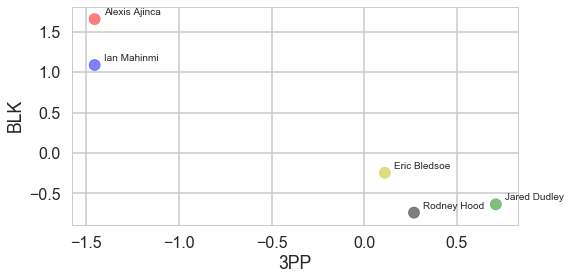

In [203]:
##draw this five central points
fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot(111)
ax.scatter(df_stats2.iloc[closest, 2], df_stats2.iloc[closest, 7], c = ['r', 'b', 'g', 'y', 'k'], alpha = 0.5)
c = 0
ax.set_xlabel('3PP')
ax.set_ylabel('BLK')
for i,j in zip(df_stats2.iloc[closest, 2],df_stats2.iloc[closest, 7]):
    ax.annotate(df_stats2.iloc[closest, -1].values[c], xy = (i,j), xytext = (i+0.05, j+0.05))
    c = c+1

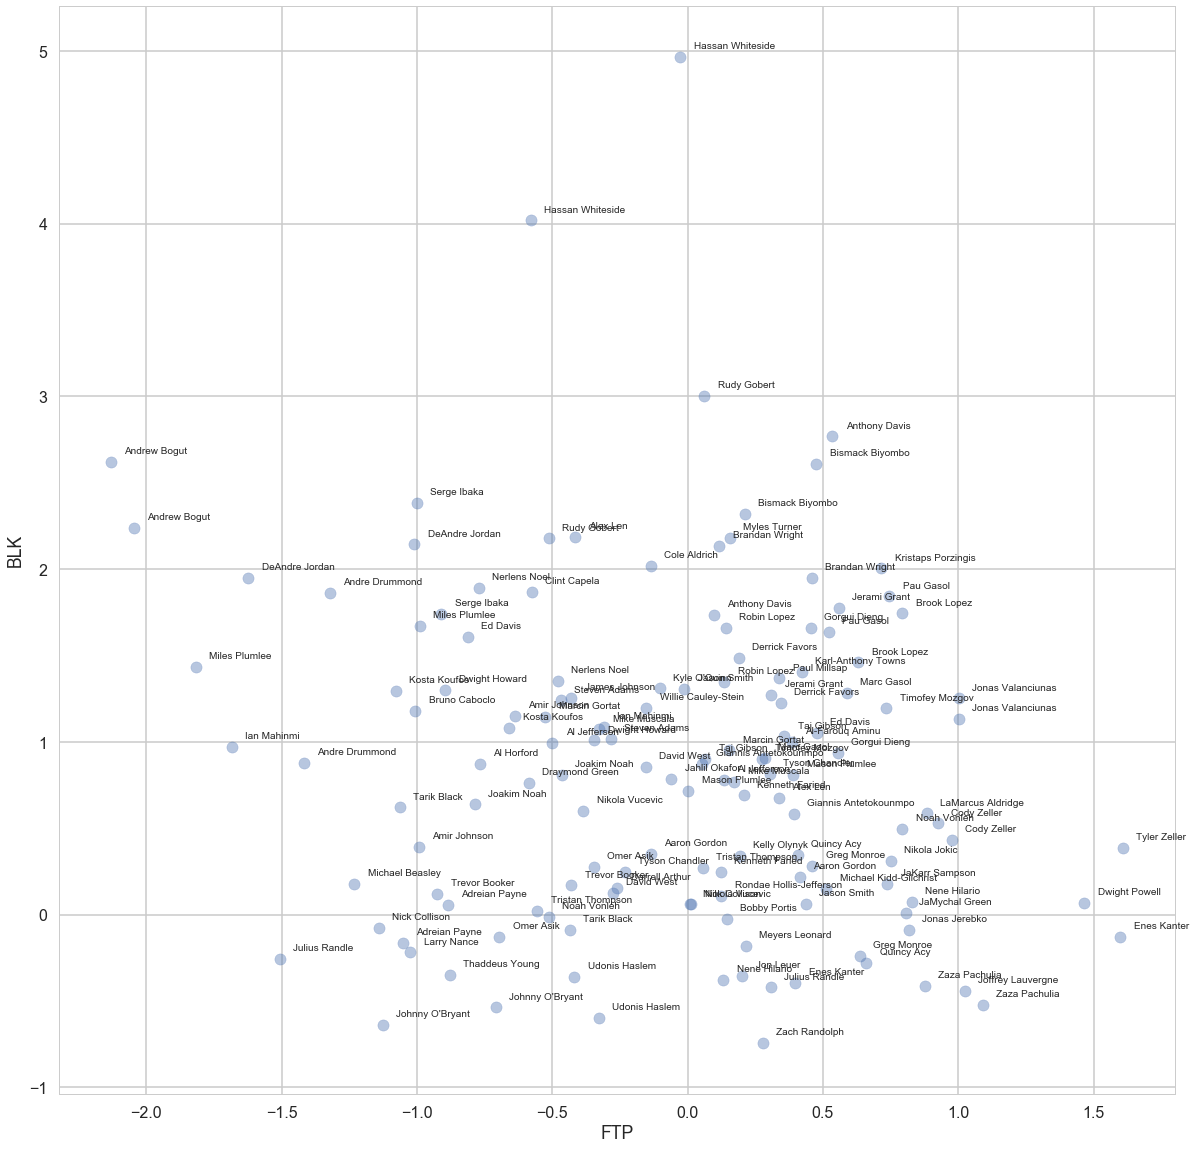

In [192]:
## REB and BLK of cluster 2 
fig = plt.figure(figsize = (20, 20))
ax = fig.add_subplot(111)
mask = labels2==1
plt.scatter(train.iloc[mask, 2], train.iloc[mask, 6], alpha=0.4)
plt.xlabel('FTP')
plt.ylabel('BLK')
c = 0
for i,j in zip(train.iloc[mask, 2], train.iloc[mask, 6]):
    ax.annotate(df_stats2.iloc[mask, -1].values[c], xy = (i,j), xytext = (i+0.05, j+0.05))
    c = c+1

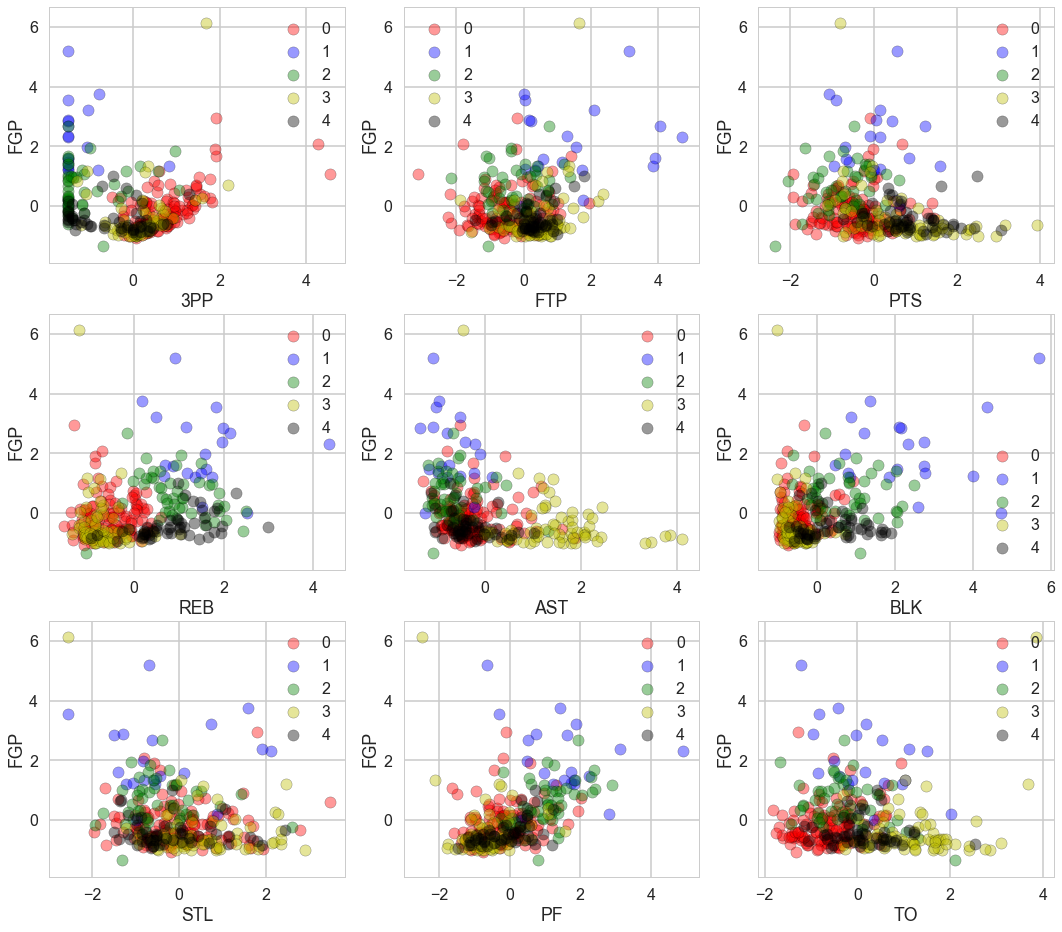

In [91]:
colors = ['r', 'b', 'g', 'y', 'k']
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
i = 0
for ax in axes.ravel():
    for label, color in zip(np.unique(labels2), colors):
        mask = labels2==label
        ax.scatter(train.iloc[mask, i+1], train.iloc[mask, 0], c=color, label=label, alpha=0.4, edgecolor='k')
    ax.legend()
    ax.set_xlabel(intersted_col[i+1])
    ax.set_ylabel('FGP')
    i = i + 1

## 2. 2 Gaussian Mixture

In [134]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)
gmm.fit(train)
cluster = gmm.predict(train)

In [136]:
gmmeans = gmm.means_ 
closest, dis = pairwise_distances_argmin_min(gmmeans, train)

In [137]:
df_stats2.iloc[closest, :]

,ID,NUM_GM,FGP,3PP,FTP,PTS,REB,AST,BLK,STL,PF,TO,MIN
103,2774.0,88.0,0.210494,-1.500048,-0.369134,-0.434008,1.066412,-0.507536,1.008900,0.150941,1.183893,-0.160610,36.0
51,3136776.0,89.0,-0.655197,0.378441,-0.355712,0.419547,-0.738060,0.606400,-0.758160,0.646308,-0.928355,1.347674,36.0
294,3136196.0,88.0,0.153575,0.296569,-0.628449,-0.524218,0.303055,-0.733939,-0.445246,-1.009726,-0.156588,-0.502710,36.0
203,2995706.0,90.0,0.154417,0.933865,-0.579808,-0.530253,-0.690502,-0.177825,-0.513887,-0.279859,0.087088,0.611951,36.0
126,3209.0,88.0,-0.697578,0.035979,-0.090508,0.004313,-0.444750,-0.402377,-0.276273,-0.399125,-0.562742,-0.723945,36.0


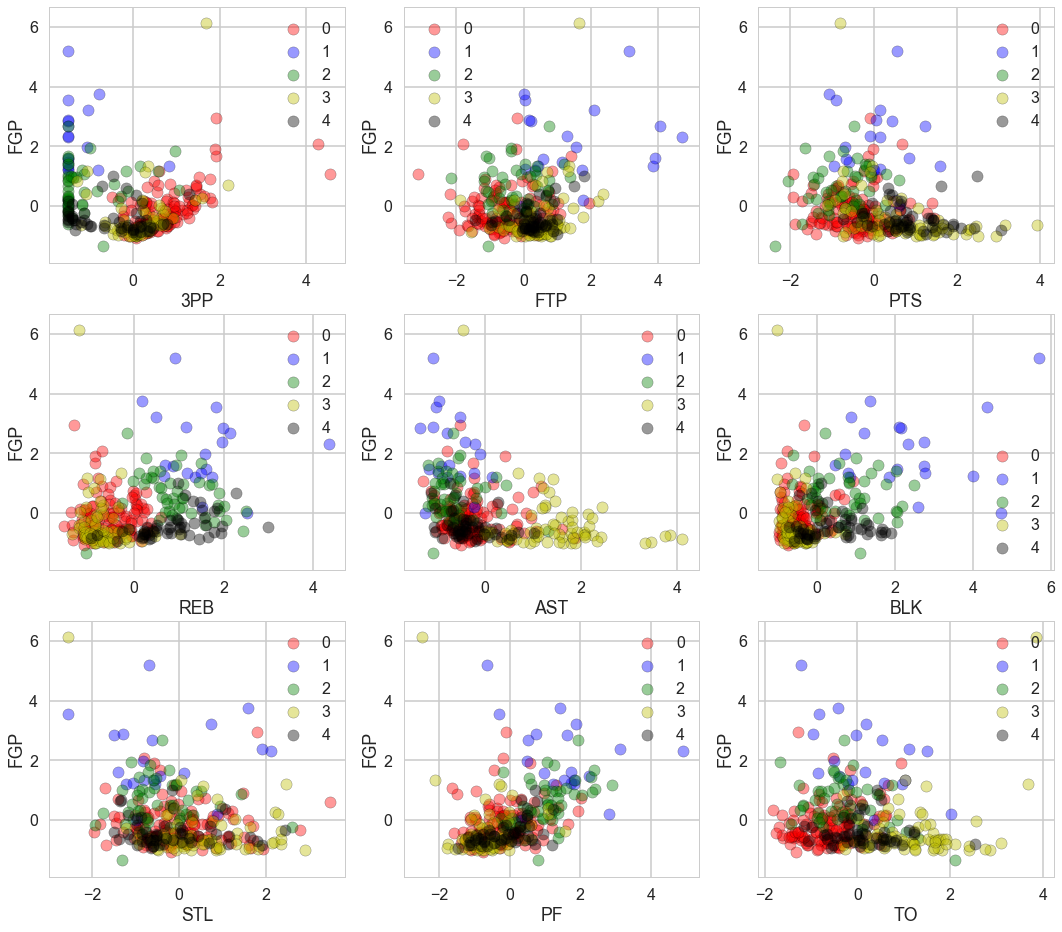

In [135]:
colors = ['r', 'b', 'g', 'y', 'k']
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
i = 0
for ax in axes.ravel():
    for label, color in zip(np.unique(cluster), colors):
        mask = labels2==label
        ax.scatter(train.iloc[mask, i+1], train.iloc[mask, 0], c=color, label=label, alpha=0.4, edgecolor='k')
    ax.legend()
    ax.set_xlabel(intersted_col[i+1])
    ax.set_ylabel('FGP')
    i = i + 1

# 3. PCA

In [153]:
train.head()

,FGP,3PP,FTP,PTS,REB,AST,BLK,STL,PF,TO,MIN
0,0.340203,-0.098923,1.069449,-0.314386,-0.605203,0.737263,-0.522915,0.032806,-0.455569,-0.419163,36.0
1,-0.360885,-0.431908,0.421378,1.361997,1.660056,-0.472172,1.405587,-0.771710,0.226417,0.565642,36.0
2,0.841736,2.207107,0.409660,-0.269009,-1.021519,1.320725,-0.964426,0.857495,-0.676697,0.868415,36.0
3,-0.839859,0.356687,0.968622,1.236479,0.222389,-0.901020,-0.451428,-0.994244,-1.100077,-0.555149,36.0
4,-0.868148,0.188367,0.495015,0.837325,1.501097,-0.182010,-0.232019,-0.629603,-0.786042,0.030544,36.0


In [154]:
from sklearn.decomposition import PCA

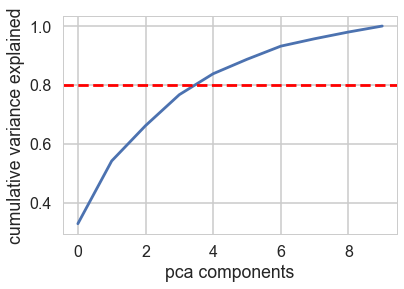

In [155]:
train2 = train.iloc[:, :-1]
pca = PCA()
pca.fit(train2)
var_c = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(len(var_c)), var_c)
plt.axhline(0.8,ls='--',color='red')
plt.xlabel("pca components")
plt.ylabel("cumulative variance explained");

In [156]:
n_components_pca = np.sum(var_c<0.8)
print("the first %i components explain %0.3f of variance" % (n_components_pca, var_c[n_components_pca]))

the first 4 components explain 0.838 of variance


In [157]:
pca = PCA(n_components=4)
pca.fit(train2)
train_pca = pca.transform(train2)

In [158]:
train_pca.shape

(585, 4)

In [159]:
#print(pca.components_)

In [160]:
comp = pca.components_
df_pca = pd.DataFrame(comp, columns = ['FGP','3PP','FTP','PTS','REB','AST','BLK','STL','PF','TO'])
#del df_pca['MIN']

In [161]:
df_pca

,FGP,3PP,FTP,PTS,REB,AST,BLK,STL,PF,TO
0,0.337287,-0.338555,0.052874,-0.152747,0.449686,-0.369649,0.444768,-0.204324,0.378306,-0.154758
1,-0.012031,-0.279599,0.453545,0.458054,0.205672,0.332380,0.168242,0.200589,0.088225,0.526365
2,0.175915,-0.030354,-0.321394,-0.492412,-0.033222,0.298480,-0.022848,0.545299,0.415914,0.247623
3,0.637473,0.473789,0.469155,0.011300,-0.264682,-0.073812,-0.158271,-0.052320,0.210289,0.037468


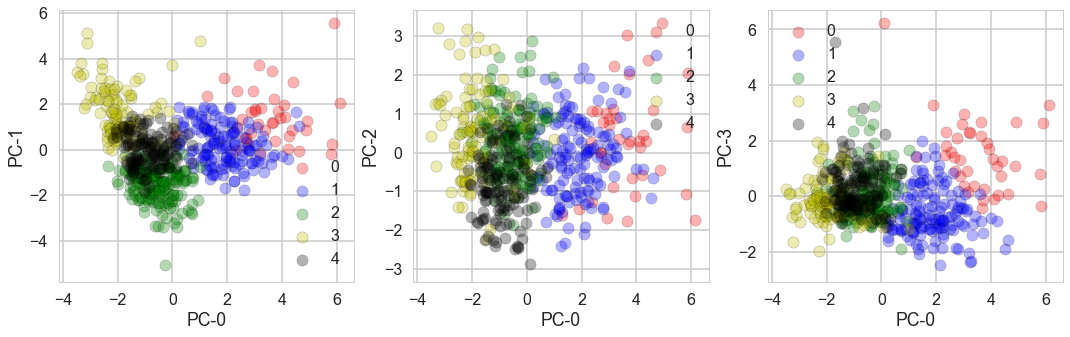

In [206]:
axis_name = ['PC-0', 'PC-1', 'PC-2', 'PC-3']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
i = 0
for ax in axes.ravel():
    for label, color in zip(np.unique(labels2), colors):
        mask = labels2==label
        ax.scatter(train_pca[mask, 0], train_pca[mask, i+1], c=color, label=label, alpha=0.3, edgecolor='k')
        ax.set_xlabel(axis_name[0])
        ax.set_ylabel(axis_name[i+1])
    i = i+1
    ax.legend()

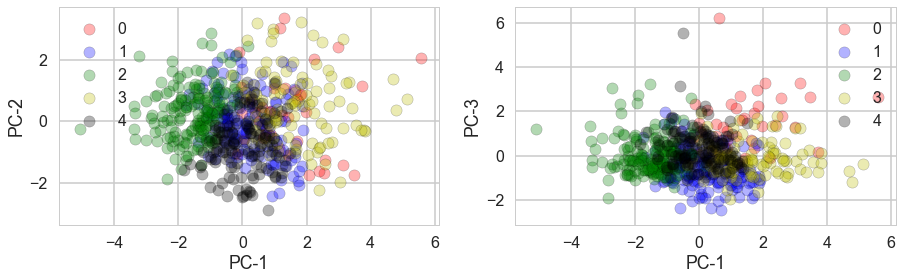

In [213]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
i = 1
for ax in axes.ravel():
    for label, color in zip(np.unique(labels2), colors):
        mask = labels2==label
        ax.scatter(train_pca[mask, 1], train_pca[mask, i+1], c=color, label=label, alpha=0.3, edgecolor='k')
        ax.set_xlabel(axis_name[1])
        ax.set_ylabel(axis_name[i+1])
    i = i+1
    ax.legend()

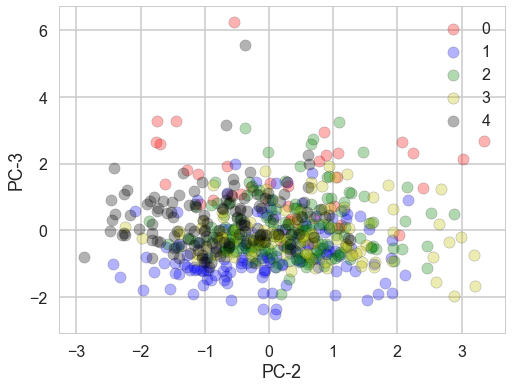

In [211]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for label, color in zip(np.unique(labels2), colors):
    mask = labels2==label
    ax.scatter(train_pca[mask, 2], train_pca[mask, 3], c=color, label=label, alpha=0.3, edgecolor='k')
    ax.set_xlabel(axis_name[2])
    ax.set_ylabel(axis_name[3])
    ax.legend()

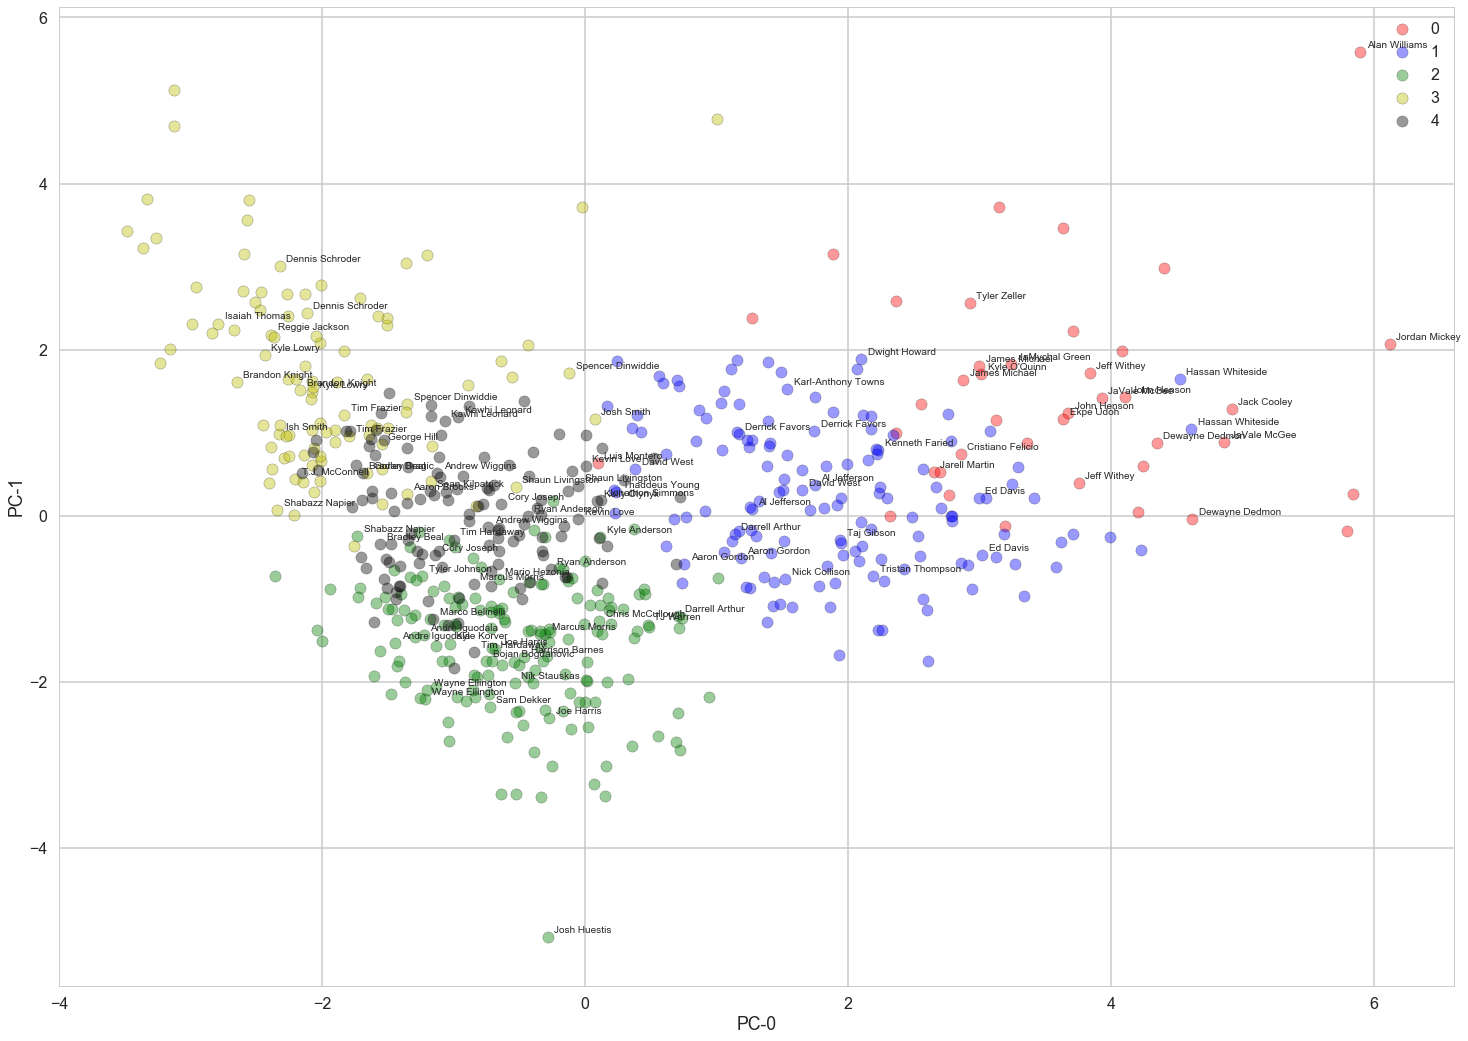

In [214]:
colors = ['r', 'b', 'g', 'y', 'k']
fig = plt.figure(figsize = (25, 18))
ax = fig.add_subplot(111)
#show 20 players in each cluster
for label, color in zip(np.unique(labels2), colors):
    count = 0
    mask = labels2==label
    ax.scatter(train_pca[mask, 0], train_pca[mask, 1], c=color, label=label, alpha=0.4, edgecolor='k')
    ax.set_xlabel('PC-0')
    ax.set_ylabel('PC-1')
    c = 0
    for i,j in zip(train_pca[mask, 0], train_pca[mask, 1]):
        if count  < 20:
            ax.annotate(df_stats2.iloc[mask, -1].values[c], xy = (i,j), xytext = (i+0.05, j+0.05))
            c = c+1
            count = count + 1
    ax.legend()